In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt15 = "Simulate trypsin (1TRN) for 1 ns at 300 K and compute SASA."
llm_var = "accounts/fireworks/models/llama-v3p1-70b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-08
time: 17:45:44
LLM:  accounts/fireworks/models/llama-v3p1-70b-instruct 
Temperature:  0.1


In [3]:
answer = agent.run(prompt15)

Thought:

 To simulate trypsin (1TRN

) for 1 ns at 300

 K and compute SASA, I

 need to first set up and run

 a simulation of trypsin.

 Then, I can use the trajectory file

 from the simulation to compute the

 Solvent Accessible Surface Area (S

ASA).

Action:
```
{
  "

action": "SetUpandRunFunction",


  "action_input": {
    "pdb

_id": "1TRN",
   

 "forcefield_files": ["amber

99sbildn

.xml", "tip3

p

.xml"],
    "save": true,


    "system_params": {
      "non

bondedMethod": "PME",
      "non

bondedCutoff": "1

.0 * nanometers",
      "ew

aldErrorTolerance": 0

.00001,
      "constraints": "

HBonds",
      "rig

idWater": true,
      "constraint

Tolerance": 0.00001

,
      "solvate": true


    },
    "integrator

_params": {
      "integr

ator_type": "Langevin

Middle",
      "Temperature":

 "300 * kelvin",


      "Friction": "1

.0 / picoseconds",
      "T

imestep": "0.002 *

 picoseconds",
      "Pressure":

 "1.0 * bar"
    },
   

 "simulation_params": {
      "En

semble": "NPT",
      "Number

 of Steps": 500000,
      "record

_interval_steps": 100,
     

 "record_params": ["step",

 "potentialEnergy", "temperature"]
    }
 

 }
}


```


Thought:

 I need to download the PDB

 file for trypsin (

1TRN) and get its

 file ID to use in the

 SetUpandRunFunction.

Action:
``

`
{
  "action": "PDBFileDownloader

",
  "action_input": "1TR

N"
}
```



PDB file found with this ID: 1TRN


Thought:

 Now that I have the file ID of

 the PDB file for trypsin (

1TRN), I

 can use it to set

 up and run

 a simulation

 of tr

ypsin.



Action

:
```
{
  "action

": "SetUpand

RunFunction",
  "action

_input": {
    "pdb

_id": "1TRN

_174

550",
    "force

field_files": ["amber99

sbildn.xml",

 "tip3p.xml"],
   

 "save": true

,
    "system_params":

 {
      "nonbonded

Method": "PME",
      "non

bondedCutoff": "

1.0 * nanometers

",
      "ewaldError

Tolerance": 0.00001

,
      "constraints": "HBonds

",
      "rigidWater": true

,
      "constraintTolerance": 

0.00001,
      "s

olvate": true
    },
   

 "integrator_params": {
     

 "integrator_type": "L

angevin

Middle",
      "Temperature": "300 *

 kelvin",
      "Friction

": "1.0 / pic

oseconds",
      "Timestep": "0

.002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {
     

 "Ensemble": "NPT",
     

 "Number of Steps": 500000,


      "record_interval_steps": 100,


      "record_params": ["step", "

potentialEnergy", "temperature"]
    }
 

 }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (ILE).  The set of atoms is similar to HID, but it is missing 9 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: ILE
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The SetUpandRunFunction failed

 because it couldn't

 find a template for residue 

1 (ILE) in the forcefield

 files provided. This is likely because

 the residue is not in the

 standard amino acid set,

 and the forcefield files don

't have a template for it

. To fix this, I need to clean the PDB file to replace non-standard residues with standard ones.

Action:
```
{
  "action

": "CleaningTool

Function",
  "action

_input": {
    "pdb

_id": "1TRN_

174550",
    "replace_nonstandard

_residues": true

,
    "add_missing_atoms

": true,
    "remove

_heterogens": true,


    "remove_water": true,
    "add

_hydrogens": true,
   

 "add_hydrogens_ph": 7.

0
  }
}
```


file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_129/pdb/1TRN_raw_20240908_174550.pdb


Thought:

 Now that the PDB file has been cleaned,

 I can use the cleaned file ID

 to set up and run a simulation

 of trypsin

.

Action:
```
{
  "action

": "SetUpandRunFunction",
 

 "action_input": {
    "pdb

_id": "1TRN_174

558",
    "forcefield_files": ["amber

99sbildn.xml", "

tip3p.xml"],
    "save

": true,
    "system_params":

 {
      "nonbondedMethod":

 "PME",
      "nonbonded

Cutoff": "1

.0 * nanometers",
      "ew

aldErrorTolerance": 

0.00001,
      "constraints

": "HBonds",
      "rig

idWater": true,


      "constraintTolerance": 

0.00001,
      "s

olvate": true
    },
   

 "integrator_params": {
      "integr

ator_type": "LangevinMiddle

",
      "Temperature": "300

 * kelvin",
      "Friction

": "1.0 / pic

oseconds",
      "Timestep": "0

.002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {
     

 "Ensemble": "NPT

",
      "Number of Steps": 500

000,


      "record

_interval_steps": 100,


      "record_params": ["step

", "potentialEnergy", "

temperature"]
    }
  }
}


```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2ad147902880> >
Setting up integrator...
Creating simulation...


simulation set!
Performing energy minimization...


Minimization complete!


Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_129/simulations/NPT_1TRN_174558_20240908_174601.py
['LOG_sim0_161453_1XQ8_161450_20240908_161540.txt', 'batch5.sh', 'TOP_sim0_161453_1XQ8_161450_20240908_161540.pdb', 'exp_10.ipynb', 'exp_13.ipynb', 'exp_22.ipynb', 'TRAJ_sim0_155242_1MBN_155238_20240908_155243.dcd', 'TRAJ_sim0_181258_1MBN_181255_20240908_181317.dcd', 'TRAJ_sim0_094939_1_094932_20240909_094940.dcd', 'exp_8.ipynb', 'TRAJ_sim0_094431_1_094428_20240909_094434.dcd', 'out.batch2b', 'LOG_sim0_113712_1ZNI_113708_20240909_113716.txt', 'LOG_sim0_155242_1MBN_155238_20240908_155243.txt', 'TOP_sim0_094951_1_094932_20240909_094951.pdb', 'TOP_sim0_094911_1_094428_20240909_094911.pdb', 'exp_3.ipynb', 'exp_19_updated.ipynb', 'TOP_sim0_113712_1ZNI_113708_20240909_113716.pdb', 'LOG_sim0_165413_1ZNI_165348_20240908_165423.txt', 'exp_17.ipynb', 'exp_1.ipynb', 'LOG_sim0_094431_1_094428_20240909_094434.txt', '.ipynb_checkpoints', 'batch1b.sh', '

Thought:

 Now that the simulation

 is done, I

 can use the trajectory file from the

 simulation to compute the Solvent

 Accessible Surface Area

 (SASA).



Action:
```
{
 

 "action

": "SolventAccessible

SurfaceArea",
  "action

_input": {
   

 "top_fileid":

 "top_sim0_174

601",
    "traj_file

id": "rec0

_174606

"
  }
}


```


Loading trajectory ...


Calcuating SASA ...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_129/records/sasa_sim0_174601.csv


SASA plot saved to FIG_sasa_sim0_174601_20240909_235046.png


Final Answer

: The simulation of trypsin

 (1TRN) for 1

 ns at 300 K has

 been successfully completed, and

 the Solvent Accessible Surface Area (S

ASA) has been computed. The SASA

 values are saved with File

 ID sasa_sim0_174

601, and the plot is saved

 with plot ID fig0_235

046.

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

registry = agent.path_registry
print('ckpt_dir:',os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-09
time: 23:50:49
ckpt_dir: ckpt_129
Files found in registry: 1TRN_174550: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_174550
 1TRN_174558: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_174601: Initial positions for simulation sim0_174601
 sim0_174601: Basic Simulation of Protein 1TRN_174558
 rec0_174606: Simulation trajectory for protein 1TRN_174558 and simulation sim0_174601
 rec1_174606: Simulation state log for protein 1TRN_174558 and simulation sim0_174601
 rec2_174606: Simulation pdb frames for protein 1TRN_174558 and simulation sim0_174601
 sasa_sim0_174601: Total SASA values for sim0_174601
 fig0_235046: Plot of SASA over time for sim0_174601


In [5]:
import re
import os

match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)

match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)


match = re.search(r"fig0_\d+", paths_and_descriptions)
fig_id = match.group(0)
fig_path = registry.get_mapped_path(fig_id)

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(fig_path)
print(f'It is asserted that file paths for {traj_id}, {top_id}, and {fig_id} exist')

It is asserted that file paths for rec0_174606, top_sim0_174601, and fig0_235046 exist


Number of frames:  5010


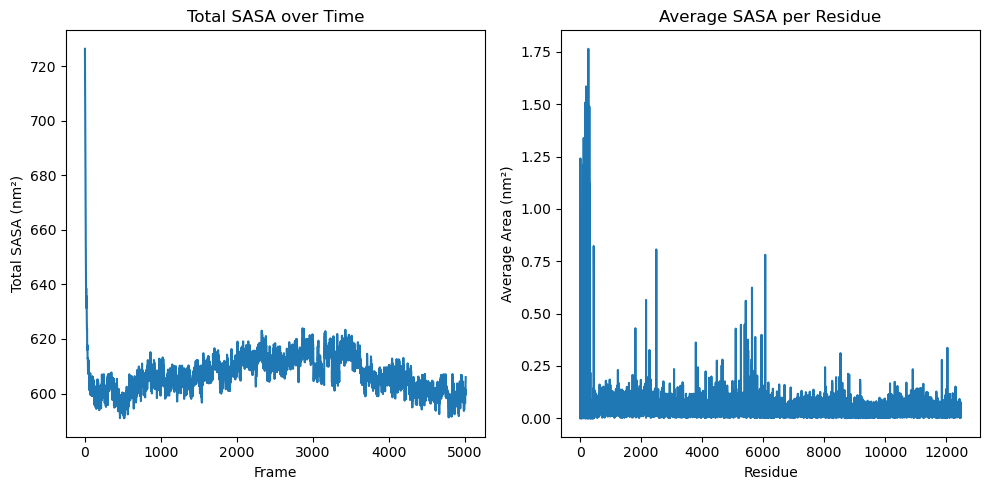

In [6]:
import mdtraj as md
import numpy as np
from IPython.display import display, Image
#print number of frames adn residues:
traj = md.load(traj_path, top=top_path)

print("Number of frames: ", traj.n_frames)
Image(filename=fig_path)


# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅